Generating Pageviews (User Only) chart...


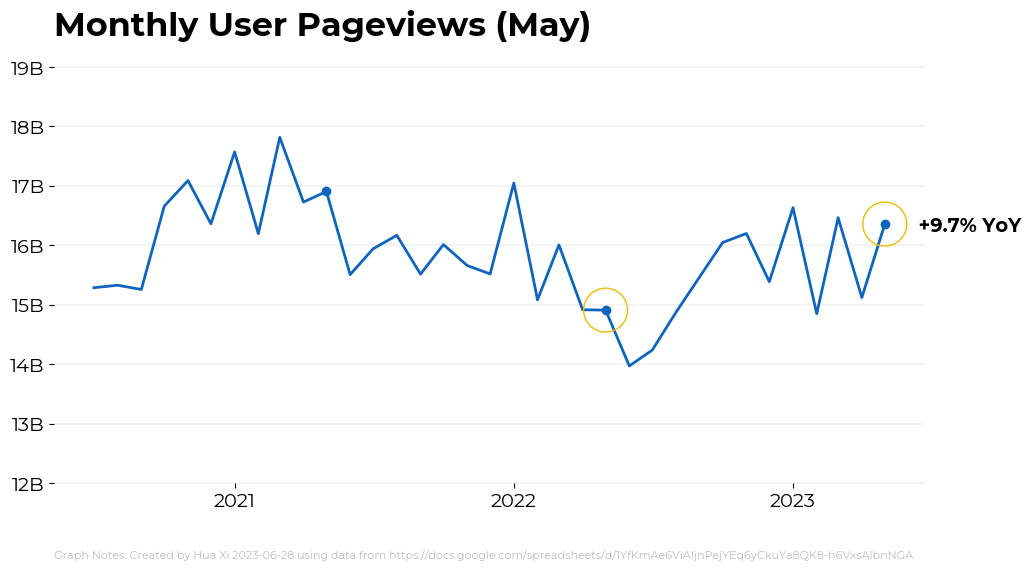

In [1]:
import pandas as pd
from datetime import date, datetime, timedelta
import matplotlib.pyplot as plt
import matplotlib.font_manager
import os
from os.path import dirname
#local
#from wikicharts import Wikichart, wmf_colors
#jupyter notebook
%run wikicharts.ipynb

def main():
    print("Generating Pageviews (User Only) chart...")

    #---PARAMETERS---
    #current path
    home_dir = os.getcwd()
    #py file only (comment out next line in jupyter notebook)
    #home_dir = dirname(home_dir)
    #where file is saved
    outfile_name = "Pageviews_Useronly.png"
    save_file_name = home_dir + "/charts/" + outfile_name
    #note for labeling the YoY highlight
    yoy_note = " "
    #display or note
    display_flag = True

    #---CLEAN DATA--
    #Data Columns: "timestamp", "sum_view_count", "pageview multiplier", "pageviews_corrected"
    df = pd.read_csv(home_dir + '/resources/data/monthly_user_pageviews.csv', sep=',')

    start_date = "2020-07-01"
    end_date = datetime.today()

    #convert string to datetime
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    df.sort_values(by='timestamp')

    #truncate to preferred date range
    df = df[df["timestamp"].isin(pd.date_range(start_date, end_date))]


    #---PLOT---
    chart = Wikichart(start_date,end_date,df,time_col='timestamp')
    chart.init_plot(width=12)
    chart.plot_line('timestamp','pageviews_corrected',wmf_colors['blue'])
    chart.plot_monthlyscatter('timestamp','pageviews_corrected',wmf_colors['blue'])
    chart.plot_yoy_highlight('timestamp','pageviews_corrected')
    chart.format(title = f'Monthly User Pageviews',
        radjust=0.825,
        tadjust=0.85,
        badjust=0.15,
        data_source="https://docs.google.com/spreadsheets/d/1YfKmAe6ViAIjnPejYEq6yCkuYa8QK8-h6VxsAlbnNGA",
        titlepad=20)
    chart.annotate(x='timestamp',
        y='sum_view_count',
        num_annotation=chart.calc_yoy(y='pageviews_corrected'))
    chart.finalize_plot(save_file_name,display=display_flag)

if __name__ == "__main__":
    main()